In [28]:
import glob
import gezi
import melt as mt
import cv2
import numpy as np
import pandas as pd
from gezi import tqdm
import sys, os
sys.path.append('..')

In [29]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [30]:
from gseg.config import CLASSES

In [31]:
def read(x):
  return cv2.imread(x, cv2.IMREAD_UNCHANGED)

In [49]:
def _infer(out_dir='../working/submit/23zy013j/results', image_dir='../input/test', n=0, rand=False):
  wandb_id = os.path.basename(os.path.dirname(out_dir))
  files = glob.glob(f'{out_dir}/*')
  if n is None:
    n = np.random.randint(len(files))
  if rand:
    np.random.shuffle(files)
    files = files[:n]
  else:
    try:
      files = [files[n]]
    except Exception:
      print('----------', wandb_id)
  suffix = 'tif'
  for file in files:
    index = os.path.basename(file).split('.')[0]
    pred = read(f'{out_dir}/{index}.png').astype(np.uint8)
    pred -= 1
    r = gezi.plot.segmentation(
        gezi.read_tiff(f'{image_dir}/{index}.{suffix}')[0],
        pred,
        CLASSES,
        title=f'{wandb_id}:{index}',
    )

In [59]:
def eval(x, y, n=0, image_dir='../input/test', rand=False):
  label_dir = f'../working/submit/{y}/results'
  out_dir = f'../working/submit/{x}/results'
  wandb_id = os.path.basename(os.path.dirname(out_dir))
  files = glob.glob(f'{image_dir}/*')
  if n is None:
    n = np.random.randint(len(files))
  if rand:
    np.random.shuffle(files)
    files = files[:n]
  else:
    try:
      files = [files[n]]
    except Exception:
      print('----------', wandb_id)
  suffix = 'tif'
  print(files)
  for file in files:
    index = os.path.basename(file).split('.')[0]
    label = read(f'{label_dir}/{index}.png').astype(np.uint8)
    label -= 1
    pred = read(f'{out_dir}/{index}.png').astype(np.uint8)
    pred -= 1
    r = gezi.plot.segmentation_eval(
        gezi.read_tiff(f'{image_dir}/{index}.{suffix}')[0],
        label,
        pred,
        CLASSES,
        title=f'{wandb_id}:{index}',
    )    

In [60]:
def infer(wandb_id, n=None):
  return _infer(f'../working/submit/{wandb_id}/results', n=n)

In [61]:
def infers(n=None):
  wandb_ids = [os.path.basename(x) for x in glob.glob(f'../working/submit/*')]
  if n is None:
    files = glob.glob(f'../working/submit/{wandb_ids[0]}/results/*')
    n = np.random.randint(len(files))
    print(n)
  for wandb_id in wandb_ids:
    _infer(f'../working/submit/{wandb_id}/results', n=n)

In [62]:
def read_score(wandb_id):
  m = {}
  m['wandb_id'] = wandb_id
  for line in open(f'../working/submit/{wandb_id}/score.txt'):
    if ':' in line:
      key, val = line.strip().split(':')
      try:
        val = float(val)
      except Exception:
        pass
      m[key] = val
  return m

In [63]:
wandb_ids = [os.path.basename(x) for x in glob.glob(f'../working/submit/*')]
wandb_ids

['2gqwoc7y',
 '1ygol3wh',
 '3jipthmh',
 '2hqzicaa',
 'ensemble',
 '3dahxx2k',
 '2aes1epp',
 '391qu37n',
 'wgp03dpm',
 '3d0zhbnl',
 '1jbu5zux',
 'tmiyucbq',
 '18c95eul',
 'ngznu1i3',
 '23zy013j',
 '23wnkx0q',
 '2ua0sqph',
 '2ojyoogo',
 '35hgji3e',
 '1hwpsiw9',
 'xh7s4pim']

In [64]:
read_score('23zy013j')

{'wandb_id': '23zy013j',
 'name': 'EfficientDet.EfficientNetB5.s256',
 'score': 0.3723,
 'farmland': 0.5276,
 'forest': 0.864,
 'grass': 0.0039,
 'road': 0.2735,
 'urban_area': 0.3479,
 'countryside': 0.4382,
 'industrial_land': 0.4709,
 'construction': 0.0283,
 'water': 0.7665,
 'bareland': 0.002}

In [65]:
def to_pd():
  l = []
  wandb_ids = [os.path.basename(x) for x in glob.glob(f'../working/submit/*')]
  for wandb_id in wandb_ids:
    try:
      m = read_score(wandb_id)
    except Exception:
      continue
    l.append(m)
  return pd.DataFrame(l)

In [66]:
d = to_pd()
d

,wandb_id,name,score,farmland,forest,grass,road,urban_area,countryside,industrial_land,construction,water,bareland
0,2gqwoc7y,EfficientDet.EfficientNetB5.s256.ep400.cr[].ni...,0.3773,0.5343,0.8713,0.0018,0.2804,0.3198,0.4548,0.4775,0.0479,0.7853,0.0000
1,1ygol3wh,EfficientDet.EfficientNetB6.s288.ep100.cr[].bs...,0.3973,0.5594,0.8765,0.0027,0.2831,0.3825,0.4773,0.5072,0.0640,0.7879,0.0326
2,2hqzicaa,EfficientDet.EfficientNetB6.s320.ep100.cr[].bs...,0.3909,0.5558,0.8771,0.0031,0.2842,0.3753,0.4733,0.4834,0.0588,0.7931,0.0046
3,3dahxx2k,EfficientDet.EfficientNetB5.s288.ep100.cr[].ni...,0.3860,0.5506,0.8753,0.0011,0.2710,0.3725,0.4546,0.5073,0.0421,0.7853,0.0000
4,2aes1epp,EfficientDet.EfficientNetB5.s256.dev,0.3733,0.5259,0.8650,0.0009,0.2722,0.3354,0.4428,0.4748,0.0445,0.7715,0.0000
5,391qu37n,EfficientDet.EfficientNetB5.s288.ep100.cr[0.87...,0.3871,0.5465,0.8737,0.0043,0.2610,0.3853,0.4689,0.4939,0.0494,0.7842,0.0039
6,3d0zhbnl,EfficientDet.EfficientNetB5.s288.ep100.cr[].ni...,0.3850,0.5517,0.8736,0.0014,0.2656,0.3689,0.4586,0.4893,0.0586,0.7826,0.0000
7,1jbu5zux,EfficientDet.EfficientNetB5.s256.ep300.nir.0123,0.3804,0.5379,0.8717,0.0066,0.2792,0.3381,0.4548,0.4904,0.0463,0.7790,0.0003
8,tmiyucbq,sm.Unet.EfficientNetB5.s256,0.3708,0.5291,0.8635,0.0002,0.2679,0.3350,0.4546,0.4609,0.0289,0.7678,0.0000
9,18c95eul,EfficientDet.EfficientNetB6.s320.ep100.cr0.875...,0.3936,0.5574,0.8785,0.0029,0.2880,0.3692,0.4783,0.5096,0.0631,0.7889,0.0000


['../input/test/001784.tif']


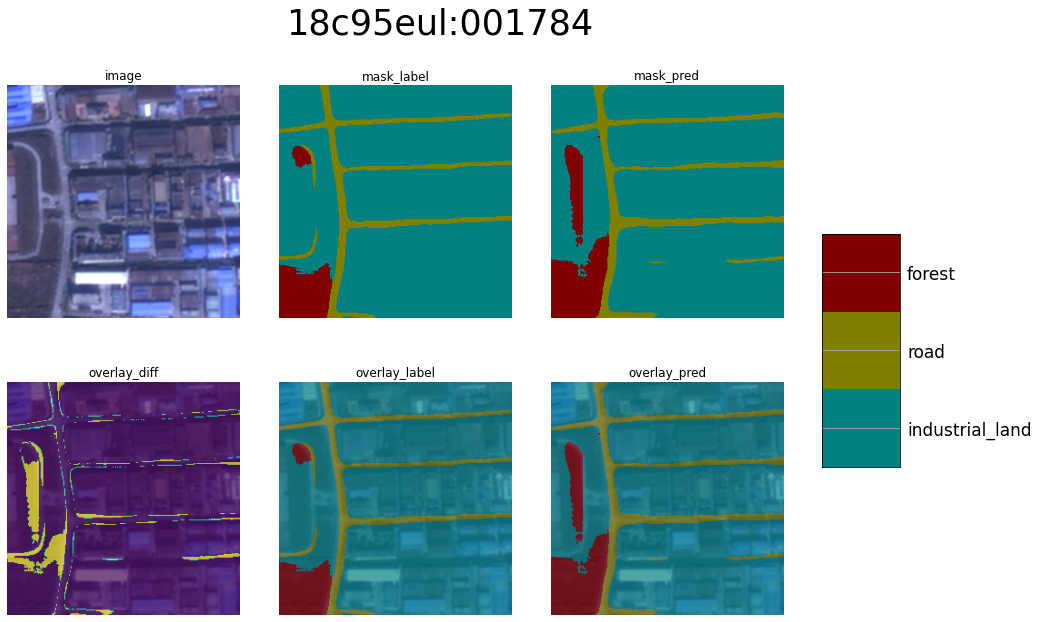

In [69]:
eval('18c95eul', 'ensemble', 1783)

306
---------- 3jipthmh
---------- wgp03dpm
---------- 23wnkx0q
---------- 2ojyoogo
---------- 1hwpsiw9


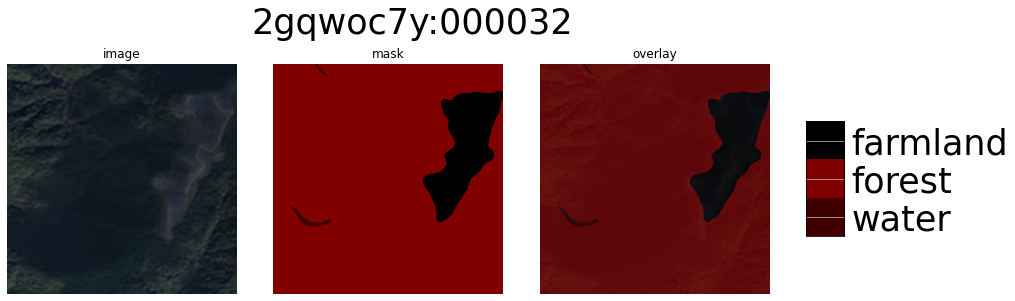

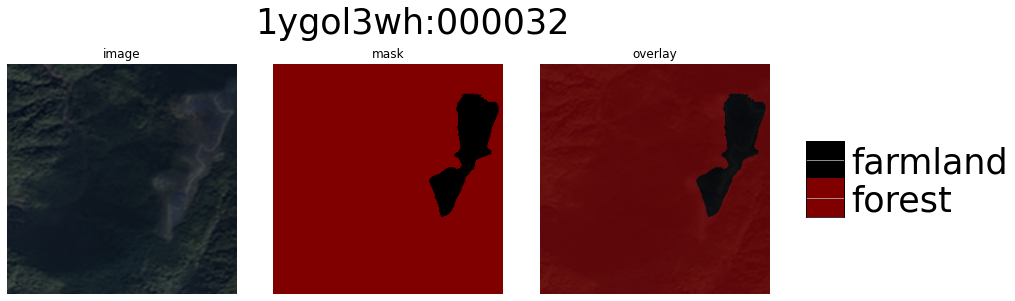

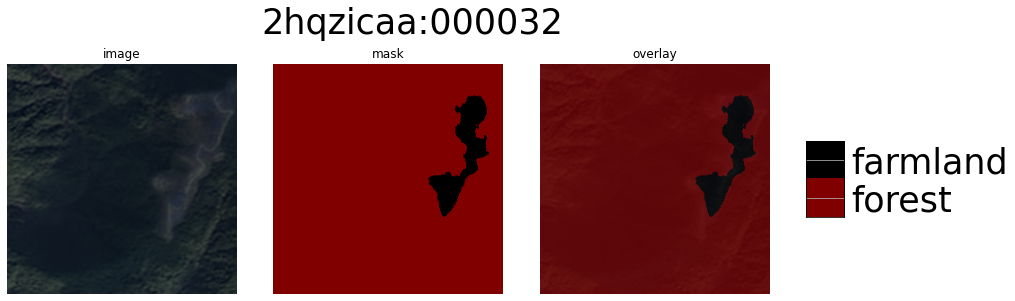

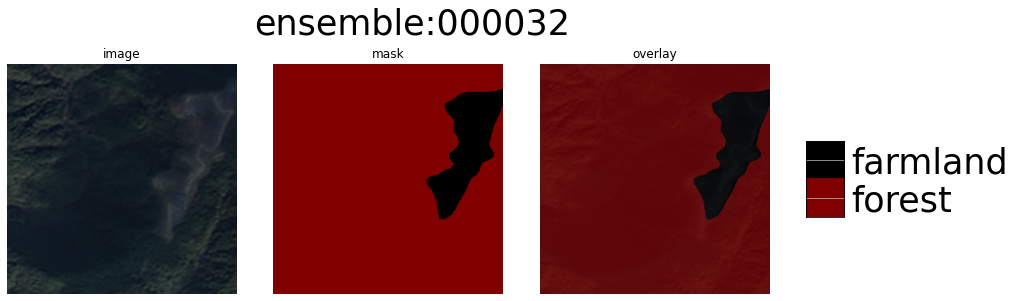

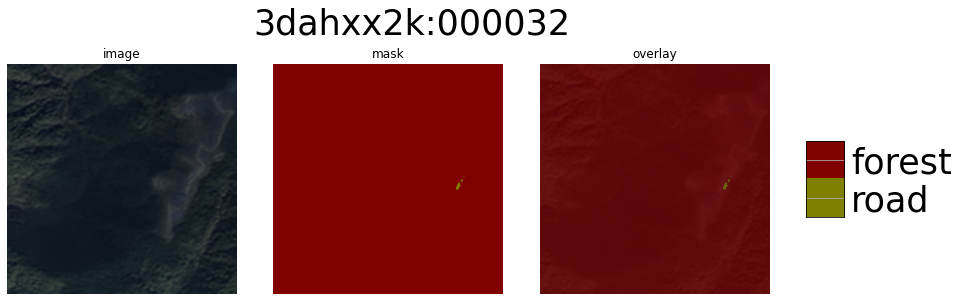

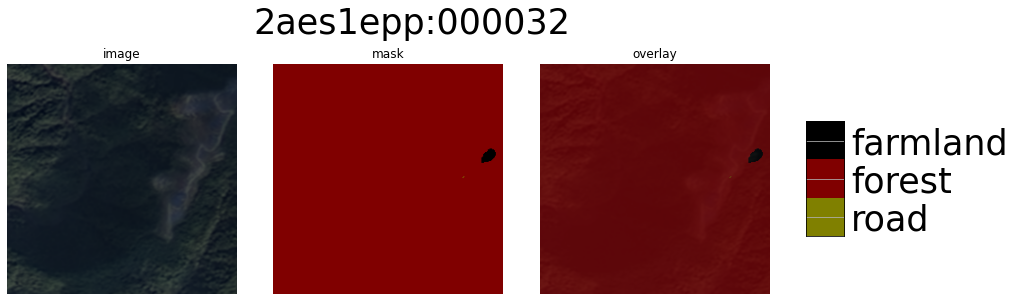

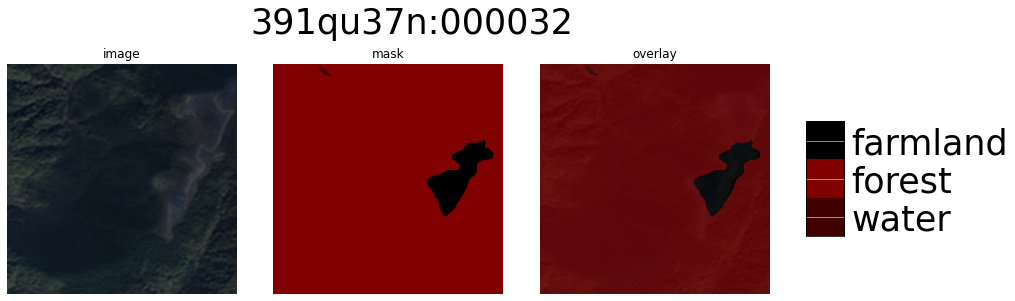

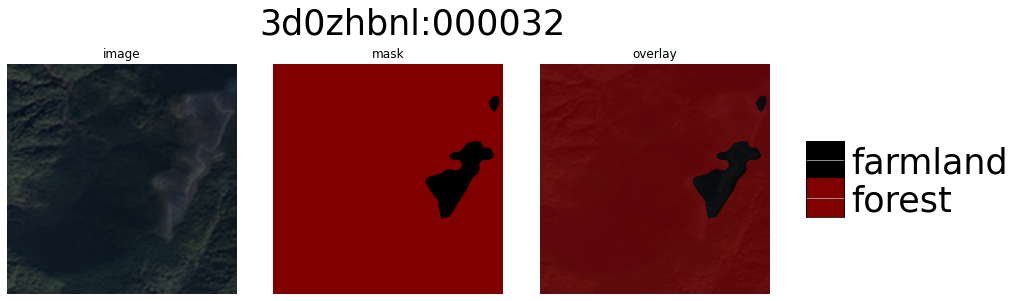

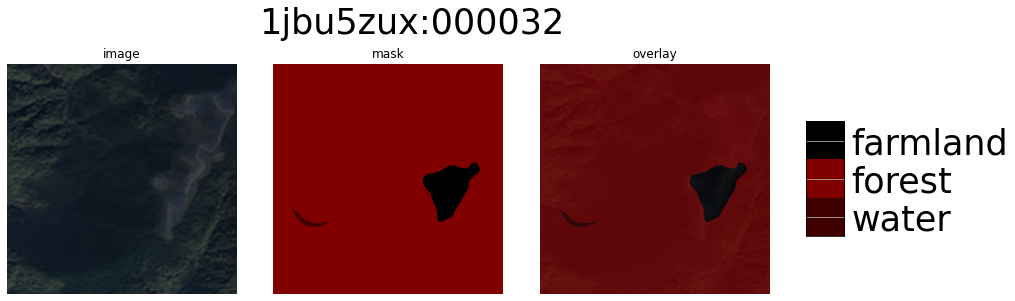

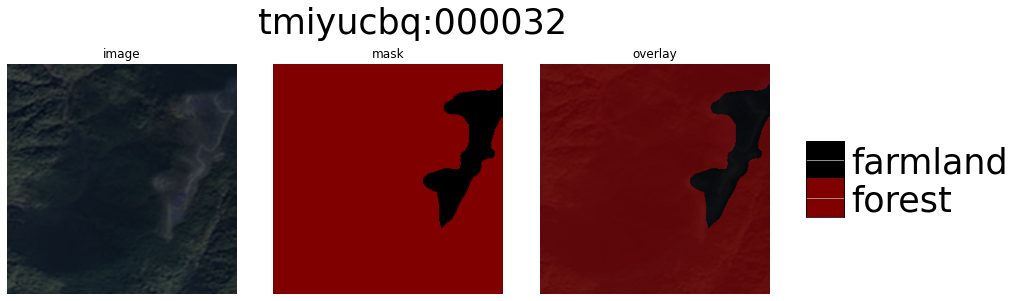

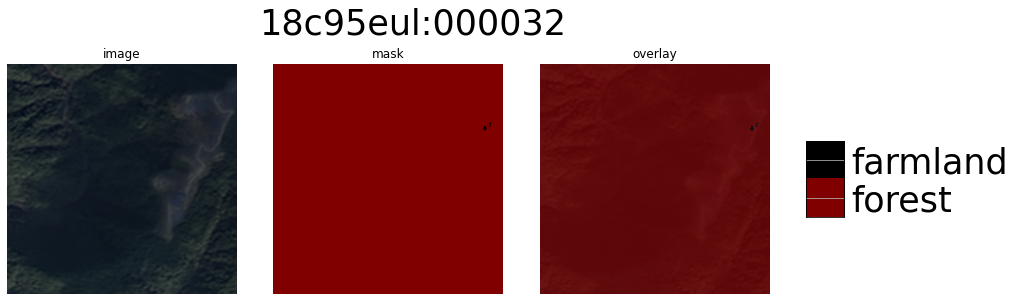

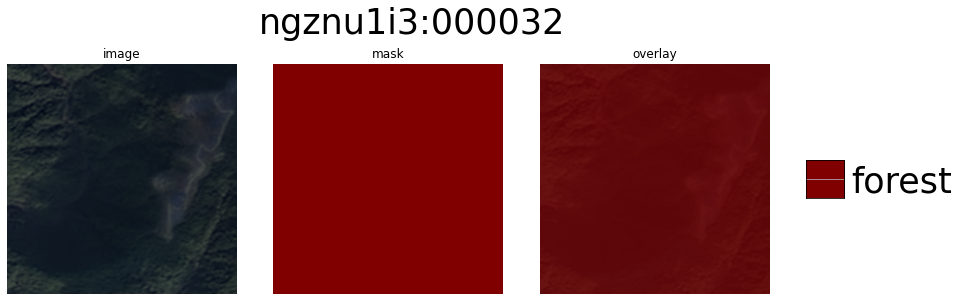

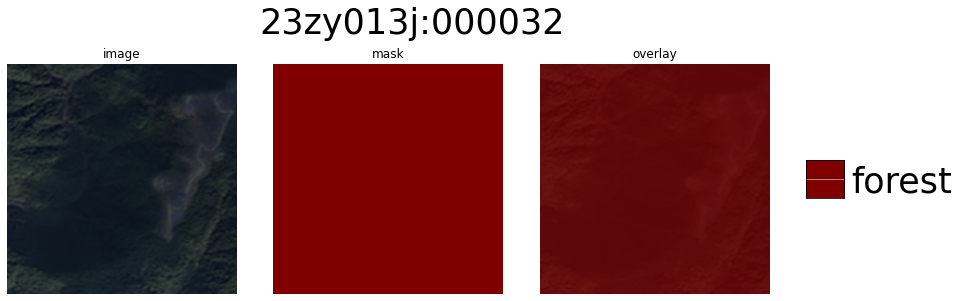

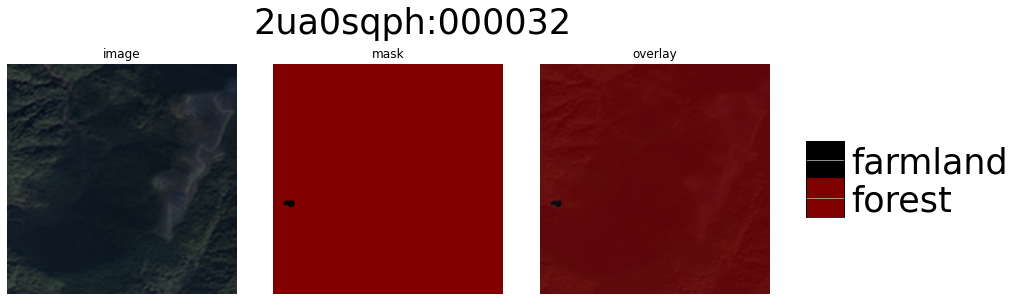

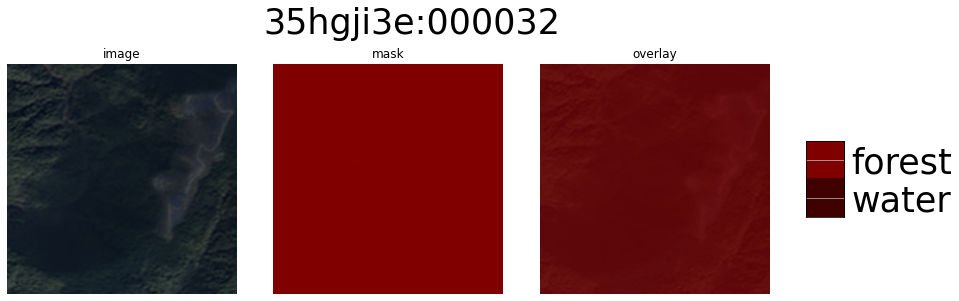

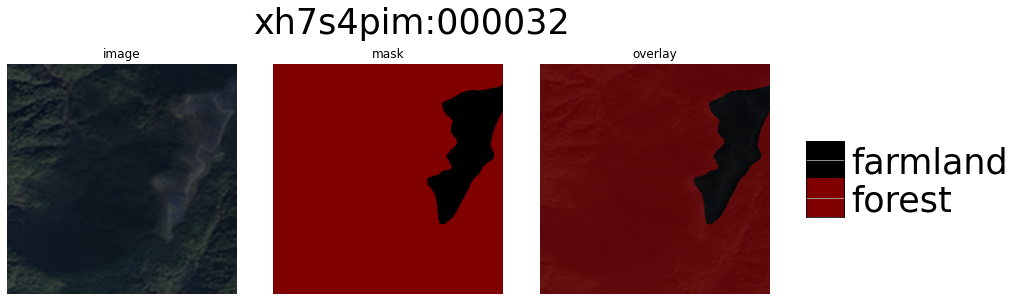

In [68]:
infers()